# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats

# Added rcParams function to change Seaborn plot size
from matplotlib import rcParams

# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [126]:
# Load data
df_cars = pd.read_csv('data/cars.csv')
df_cars.head(20)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
5,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,31200
6,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,26,17,3916,44100
7,BMW,1 Series,2012,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,39300
8,BMW,1 Series,2012,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,36900
9,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,27,18,3916,37200


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [127]:
# 1. Print the number of duplicate rows we have in our dataframe.

duplicates = df_cars.duplicated().sum()
print(f"the number of duplicated rows are {duplicates}")

the number of duplicated rows are 720


In [128]:
#  2. Modify our df to have all duplicate rows removed. 

drop_dup = df_cars.drop_duplicates(keep = 'first', inplace = True)

In [129]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

df_cars.duplicated().sum()

0

# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [130]:
# * Which column has the most null values and how many null values does it have?
df_null = df_cars.isnull().sum()#[4]
print(f"The '{df_null.idxmax()}' column has the most null values with {df_null.max()} null values")

The 'Engine HP' column has the most null values with 69 null values


In [131]:
# * Print how long our dataframe is.
df_cars.shape[0]

11194

In [132]:
# * Remove any row that has a null value in it. 
df_cars.dropna(inplace = True)

In [133]:
# * Do a sanity check and print how long our dataframe is now that we have removed our null values.
df_cars.shape[0]

11092

### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

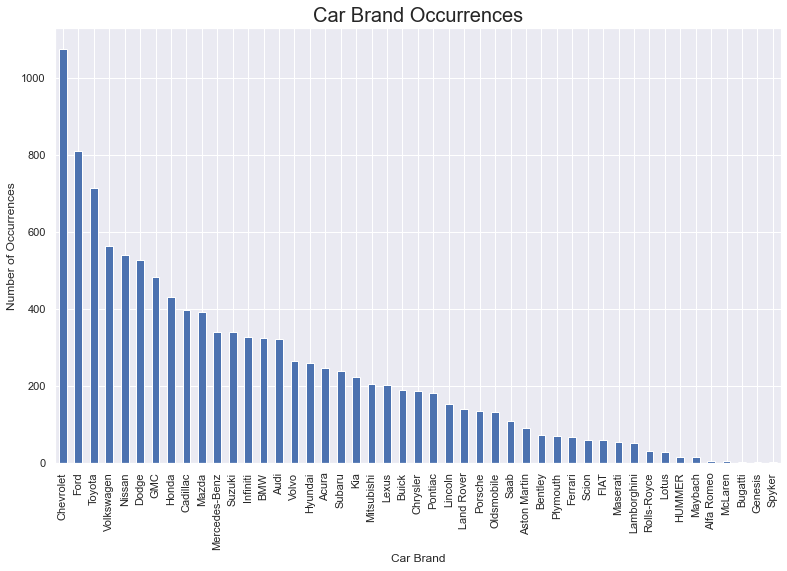

In [134]:
# Make a bar chart that displays how many times each brand of car appears in this data. 
count = df_cars.Make.value_counts()
count.reset_index()
ax = count.plot(kind = 'bar', figsize=(13,8))
ax.set_title('Car Brand Occurrences', fontsize = 20)
ax.set_xlabel('Car Brand', fontsize = 12)
ax.set_ylabel('Number of Occurrences', fontsize = 12)
plt.show()

# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

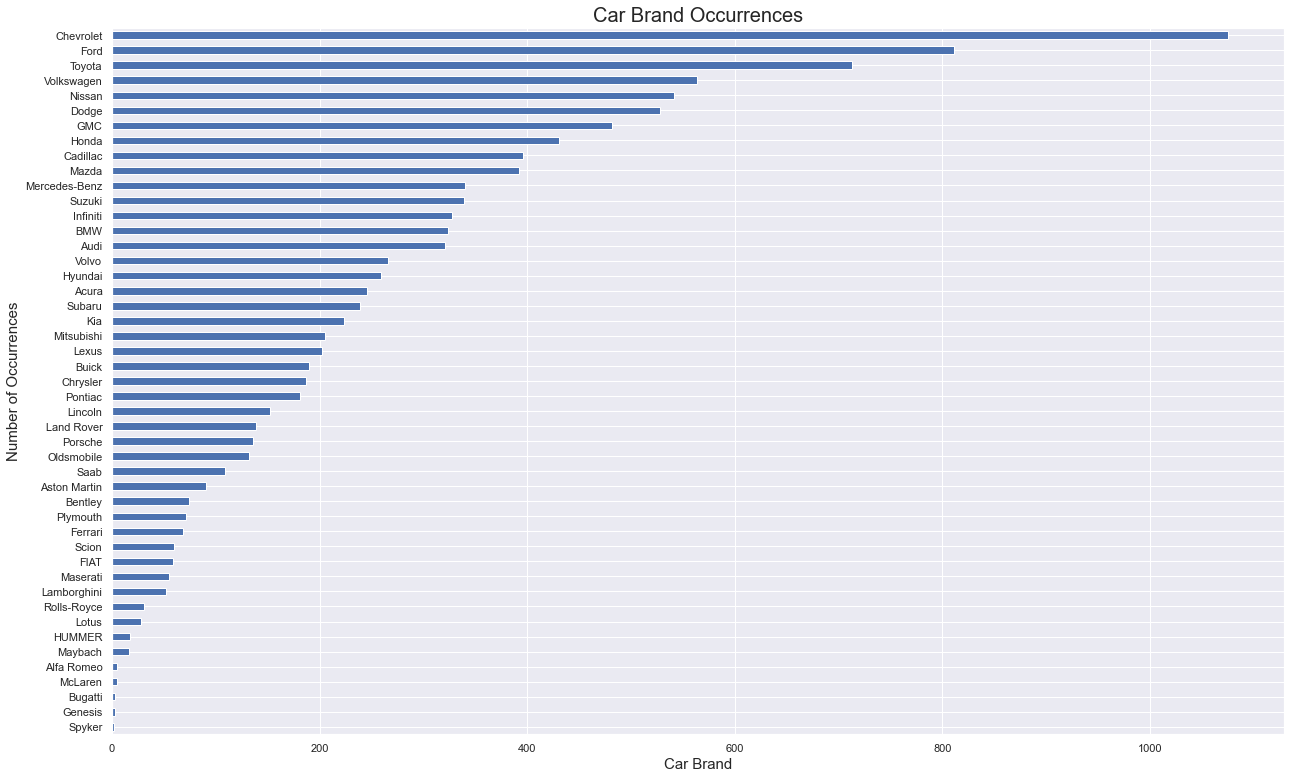

In [135]:
# Make the cart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size
count = df_cars.Make.value_counts(ascending = True)
ax = count.plot(kind = 'barh', figsize = (21,13))
ax.set_title('Car Brand Occurrences', fontsize = 20)
ax.set_xlabel('Car Brand', fontsize = 15)
ax.set_ylabel('Number of Occurrences', fontsize = 15)
plt.show()

### Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


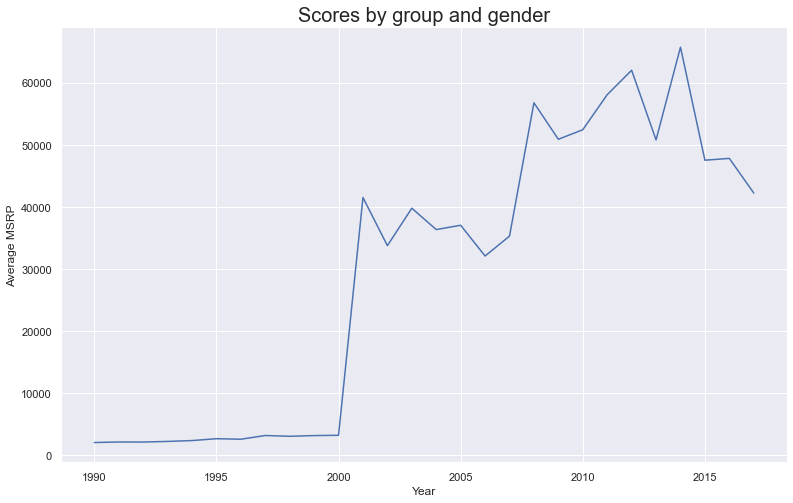

In [136]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
a_MSRP = df_cars.groupby('Year')['MSRP'].mean()

ax = a_MSRP.plot(figsize=(13,8))

ax.set_title('Scores by group and gender', fontsize = 20)
ax.set_ylabel('Average MSRP', fontsize = 12)
plt.show()

# It seems as though in the years before (and includig) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [137]:
# Make a column where is 10 when year is less than 2000, else 1.

cond = df_cars.Year <= 2000

df_cars['adjusted_price'] = np.where(cond, df_cars.MSRP * 10, df_cars.MSRP)
#df_cars.tail(40)

# Multiply the MSRP by the price adjuster.
#df_cars.MSRP = df_cars.MSRP * 10
#df_cars

# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

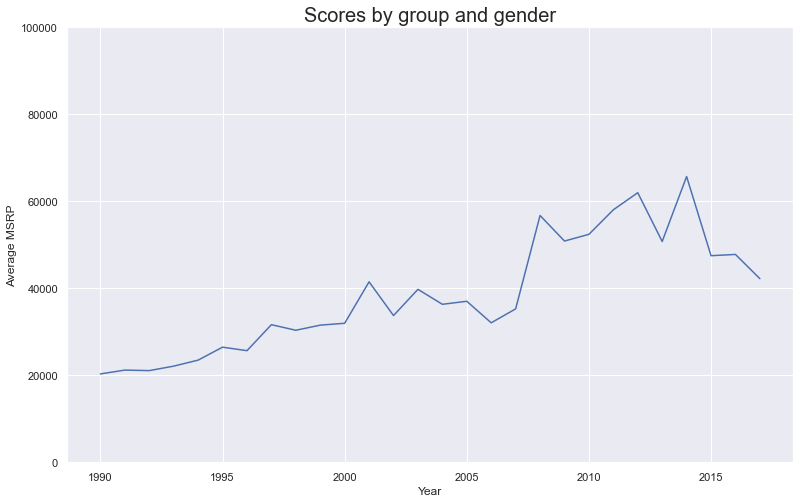

In [138]:
# Plot new prices
ad_MSRP = df_cars.groupby('Year')['adjusted_price'].mean()

ax = ad_MSRP.plot(figsize=(13,8))

ax.set_title('Scores by group and gender', fontsize = 20)
ax.set_ylabel('Average MSRP', fontsize = 12)
plt.ylim(0,100000)
plt.show()


# What are top 5 car makers that make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. (hint, you can use .head())
* Use our `adjusted_price` column for this
* Hint; you're going to have to do a .groupby to answer this.

In [139]:
# What are the top 5 car makers that make the most expensive cars on average. 
top_5_lux = df_cars.groupby(['Make'])['adjusted_price'].max().nlargest(n=5)

top_5_lux.reset_index()

,Make,adjusted_price
0,Bugatti,2065902
1,Lamborghini,1500000
2,Maybach,1382750
3,Ferrari,643330
4,Mercedes-Benz,495000


# What are the 5 car makers that have the highest median highway MPG?

In [140]:
# Which car makers have the highest median highway MPG?
top_5_hMPG = df_cars.groupby(['Make'])['highway MPG'].max().nlargest(n=5)
top_5_hMPG.reset_index()

,Make,highway MPG
0,Audi,354
1,BMW,111
2,Chevrolet,109
3,Mercedes-Benz,82
4,Toyota,53


# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']
* Create a temp_df to store the dataframe of just these values.
* Set the 'hue='Make''.

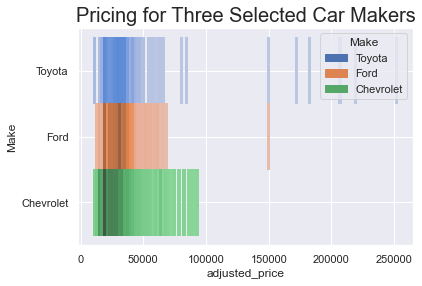

In [141]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
temp_df = df_cars[df_cars['Make'].isin(['Chevrolet', 'Ford', 'Toyota'])]

ax = sns.histplot(data = temp_df, x = 'adjusted_price', y = 'Make', hue = 'Make')
ax.set_title('Pricing for Three Selected Car Makers', fontsize = 20)
rcParams['figure.figsize'] = 21,13

# Remake the same histogram, but limit the x-axis from 0 to 100,000

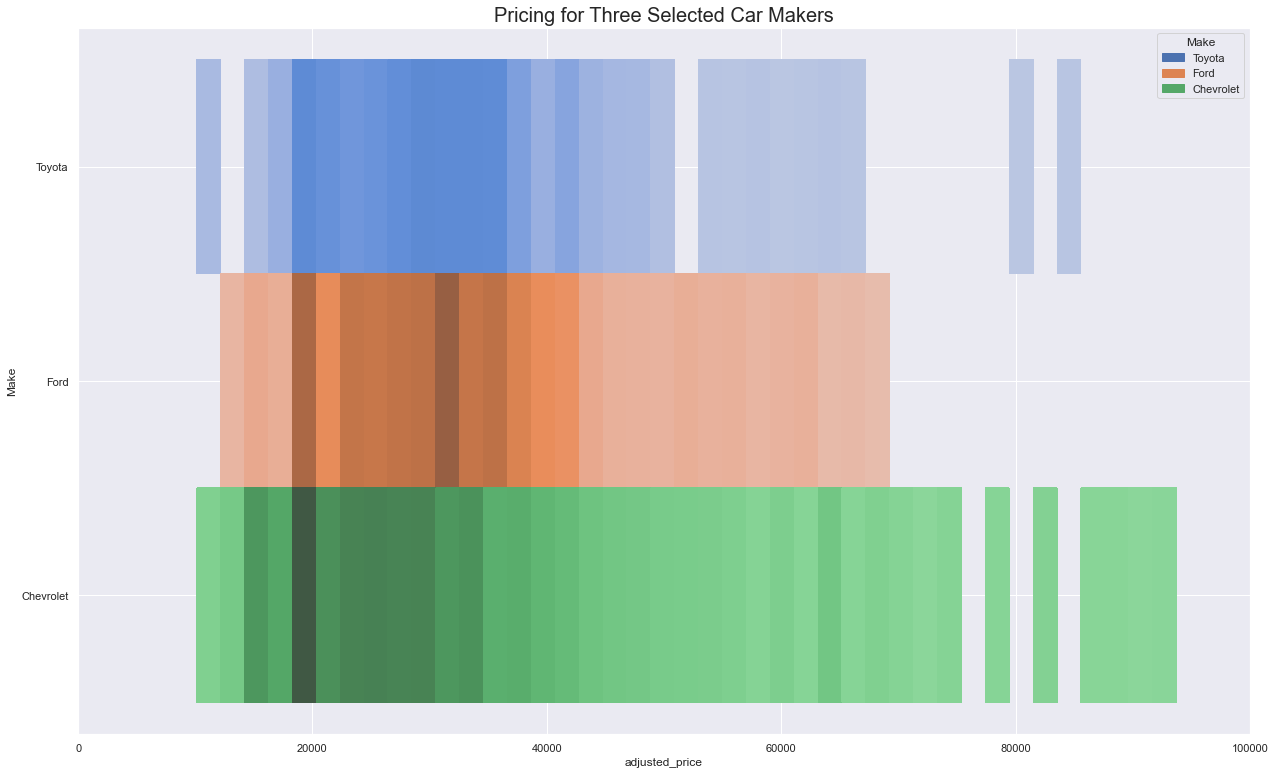

In [142]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000

ax = sns.histplot(data = temp_df, x = 'adjusted_price', y = 'Make', hue = 'Make')
ax.set_title('Pricing for Three Selected Car Makers', fontsize = 20)
rcParams['figure.figsize'] = 21,13
ax.set_xlim(left = 0, right = 100000);

# Plot the relationship between Engine HP and highway MPG

In [143]:
df_cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,adjusted_price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,34500


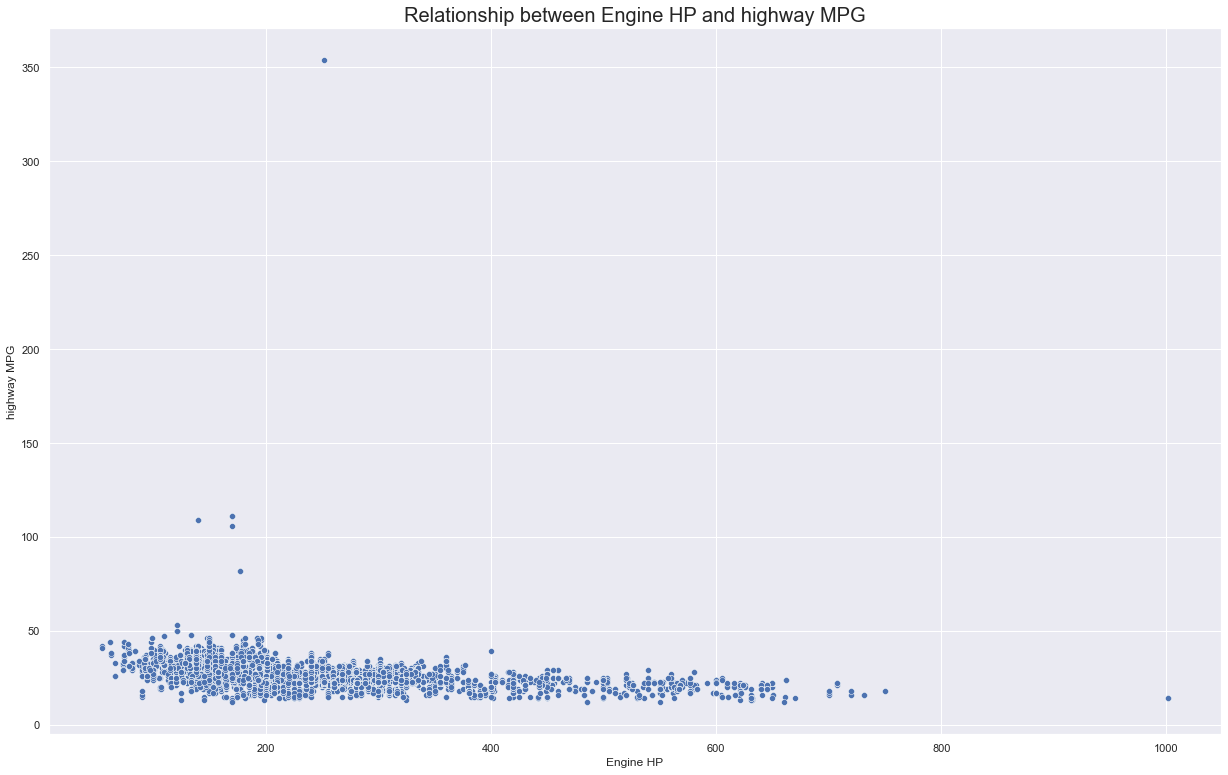

In [144]:
# Plot the relationship between Engine HP and highway MPG
ax = sns.scatterplot(data=df_cars, x='Engine HP', y='highway MPG')
ax.set_title('Relationship between Engine HP and highway MPG', fontsize = 20)
rcParams['figure.figsize'] = 21,13

# Using `sns.boxplot`, create a boxplot for the 'Engine HP'

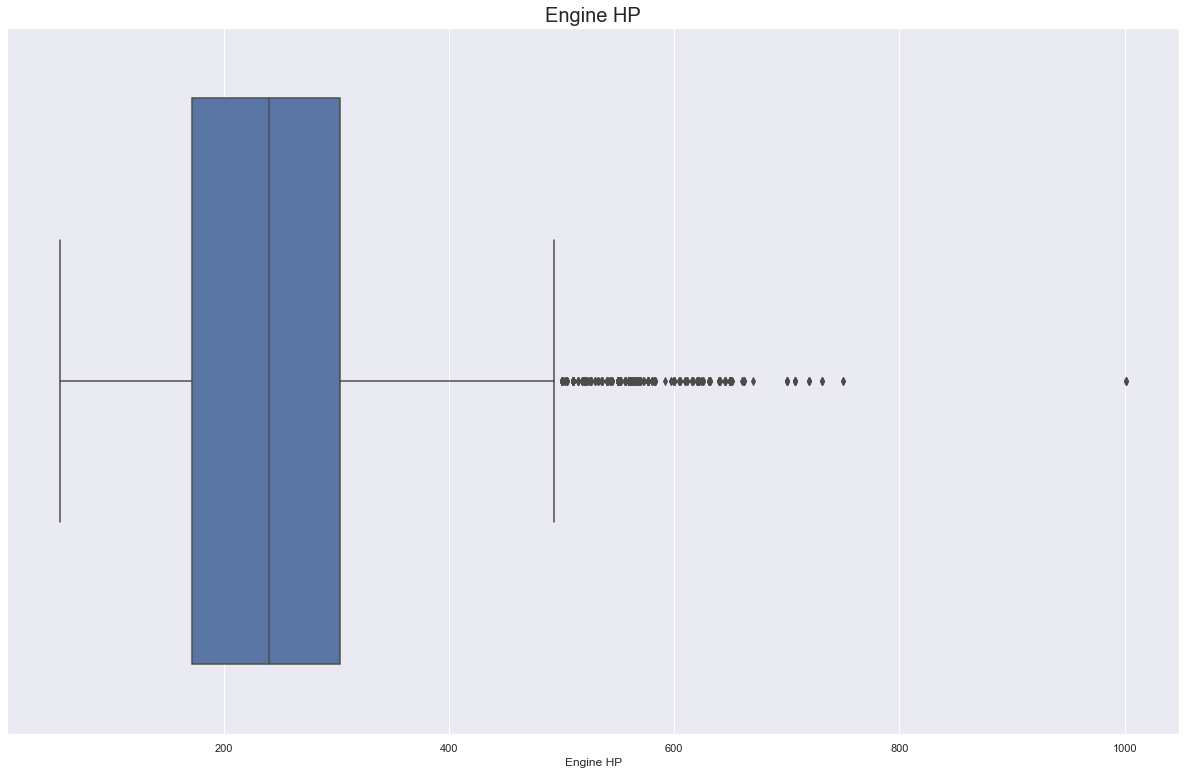

In [145]:
# create a boxplot for the 'Engine HP'
ax = sns.boxplot(data=df_cars, x='Engine HP')
ax.set_title('Engine HP', fontsize = 20)
rcParams['figure.figsize'] = 21,13

# Make another boxplot for highway MPG

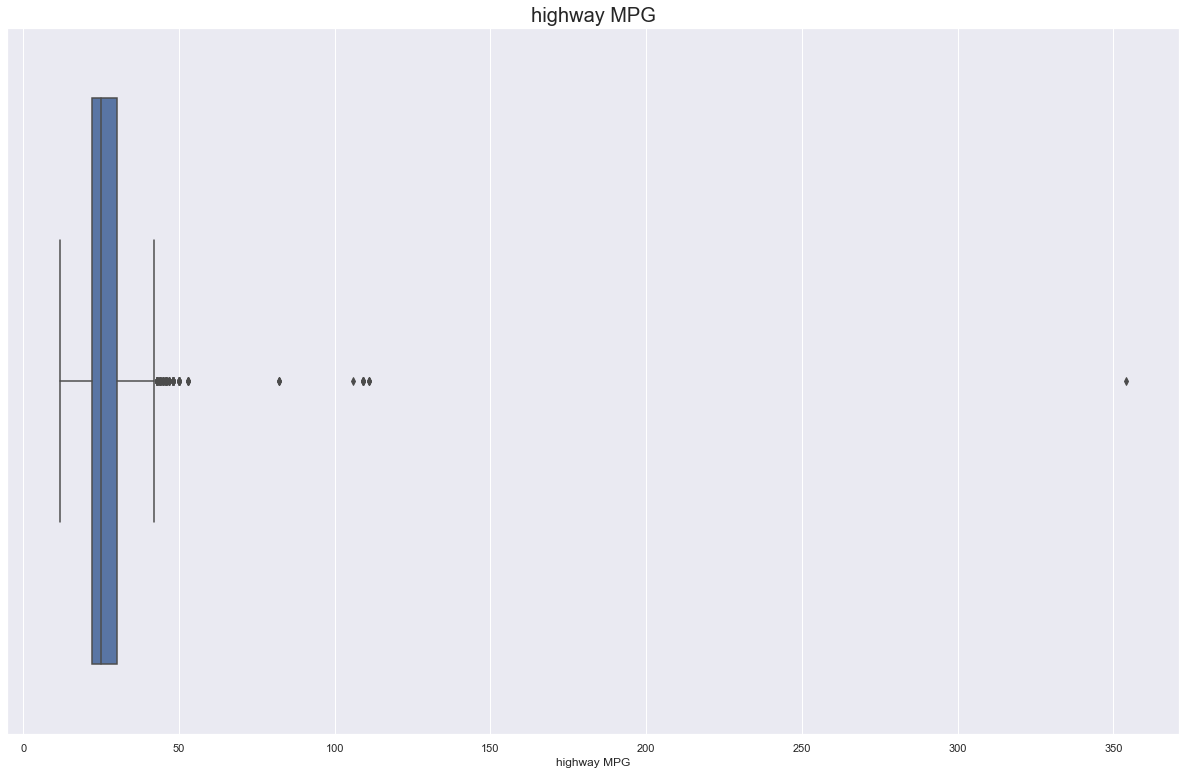

In [146]:
# create a boxplot for the 'highway MPG'
ax = sns.boxplot(data=df_cars, x='highway MPG')
ax.set_title('highway MPG', fontsize = 20)
rcParams['figure.figsize'] = 13,8

# Remove any  outliers from Engine HP and highway MPG 

<img src='https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png' width=500>

* Outliers meaning values that are outside 1.5x the Inter Quartile Range (see image above).
* For each column (Engine HP and highway MPG):
* Calculate the 0.25 and 0.75 Quantiles
* Calculate the Inter Quartile Range (IQR)
* Create condition mask for the values that are outliers below (in the 'Minimum' range).
* Create condition mask for the values that are outliers above (in the 'Maximum' range).
* Filter the dataframe to remove any values that are in the above section _OR_ the below section. (hint; it may be easier to use the inverse selection '~'.
* Make the same boxplots of Engine HP and Highway MPG as before but with the this dataframe.

In [149]:
def outlier_removal(df_cars, column_name):
    Q1 = df_cars[column_name].quantile(0.25)

    # Calculate Q3
    Q3 = df_cars[column_name].quantile(0.75)

    # Define the Inter Quartile Range (IQR)
    IQR = Q3 - Q1

    # Make select condition for the values that fall below the Q1 - 1.5*IQR
    outliers_below = df_cars[column_name] < (Q1 - 1.5 * IQR)

    # Make select condition for the values that fall above the Q3 - 1.5*IQR
    outliers_above = df_cars[column_name] > (Q3 + 1.5 * IQR)

    # Select the INVERSE of the selection
    df_cars = df_cars[ ~(outliers_above | outliers_below) ]
    return df_cars
outlier_removal(df_cars,'Engine HP')# = df_cars[['Engine HP']].apply(outlier_removal)
outlier_removal(df_cars,'highway MPG')

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,adjusted_price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920,50920


In [152]:
# Remove any  outliers from Engine HP and highway MPG 

# Calculate Q1
Q1 = df_cars['Engine HP'].quantile(0.25)

# Calculate Q3
Q3 = df_cars['Engine HP'].quantile(0.75)

# Define the Inter Quartile Range (IQR)
IQR = Q3 - Q1

# Make select condition for the values that fall below the Q1 - 1.5*IQR
outliers_below = df_cars['Engine HP'] < (Q1 - 1.5 * IQR)

# Make select condition for the values that fall above the Q3 - 1.5*IQR
outliers_above = df_cars['Engine HP'] > (Q3 + 1.5 * IQR)

# Select the INVERSE of the selection
df_cars = df_cars[ ~(outliers_above | outliers_below) ]


In [153]:
# Calculate Q1
Q1 = df_cars['highway MPG'].quantile(0.25)

# Calculate Q3
Q3 = df_cars['highway MPG'].quantile(0.75)

# Define the Inter Quartile Range (IQR)
IQR = Q3 - Q1

# Make select condition for the values that fall below the Q1 - 1.5*IQR
outliers_below = df_cars['highway MPG'] < (Q1 - 1.5 * IQR)

# Make select condition for the values that fall above the Q3 - 1.5*IQR
outliers_above = df_cars['highway MPG'] > (Q3 + 1.5 * IQR)

# Select the INVERSE of the selection
df_cars = df_cars[ ~(outliers_above | outliers_below) ]

# Remake the boxplots for both Engine HP and highway MPG


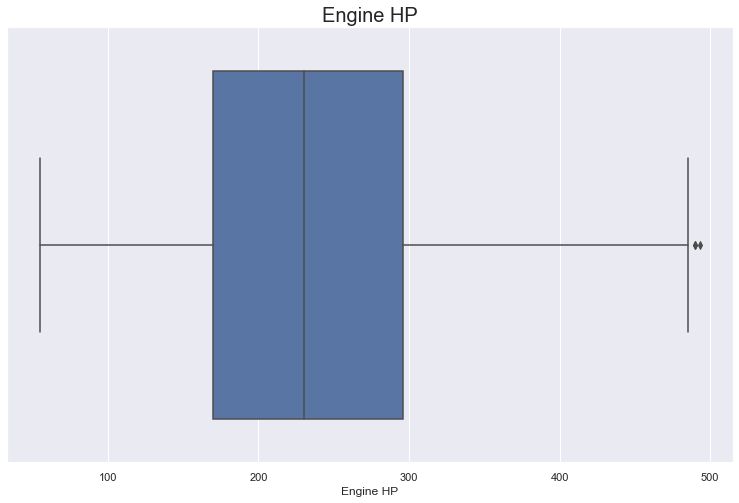

In [154]:
# Engine HP boxplot
ax = sns.boxplot(data=df_cars, x='Engine HP')
ax.set_title('Engine HP', fontsize = 20)
rcParams['figure.figsize'] = 13,8

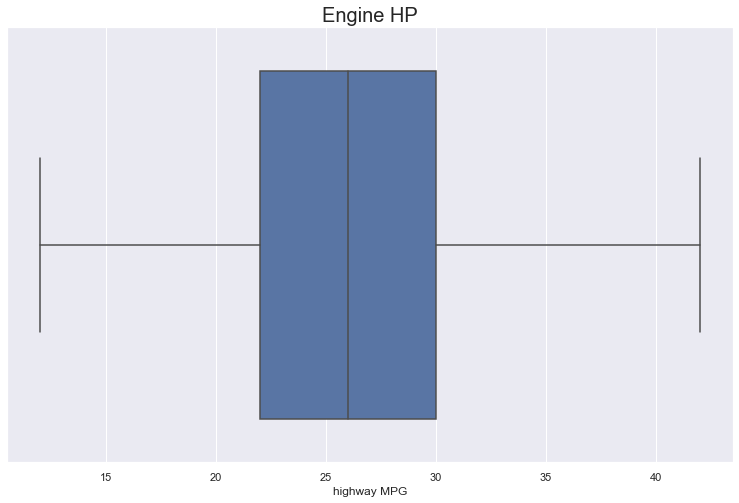

In [155]:
# highway MPG boxplot
ax = sns.boxplot(data=df_cars, x='highway MPG')
ax.set_title('Engine HP', fontsize = 20)
rcParams['figure.figsize'] = 13,8

# Make a scatter plot of Engine HP vs highway MPG

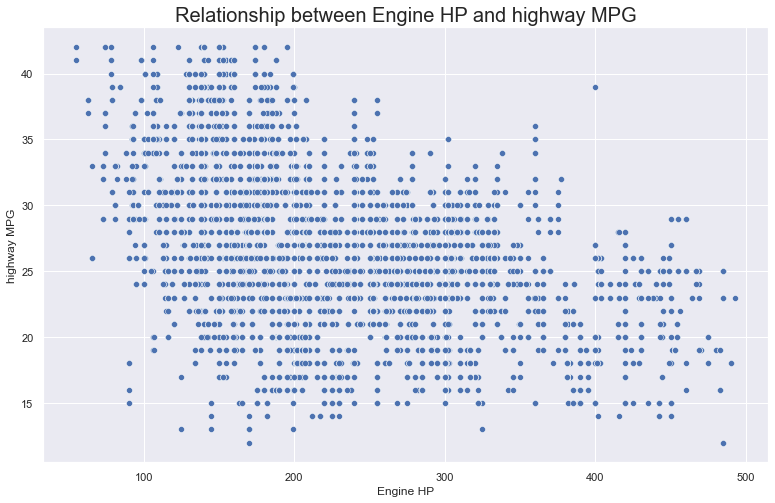

In [71]:
# Make a scatter plot of Engine HP vs highway MPG
ax = sns.scatterplot(data=df_cars, x='Engine HP', y='highway MPG')
ax.set_title('Relationship between Engine HP and highway MPG', fontsize = 20)
rcParams['figure.figsize'] = 21,13

# What does this plot tell you about how Engine HP affects highway MPG?

In [72]:
# What does this plot tell you about how Engine HP affects highway MPG?

print('The plot shows that the higher the Engine HP, the lower the highway MPG.\nIt is negatively correlated, but the correlation is weak.')

The plot shows that the higher the Engine HP, the lower the highway MPG.
It is negatively correlated, but the correlation is weak.


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

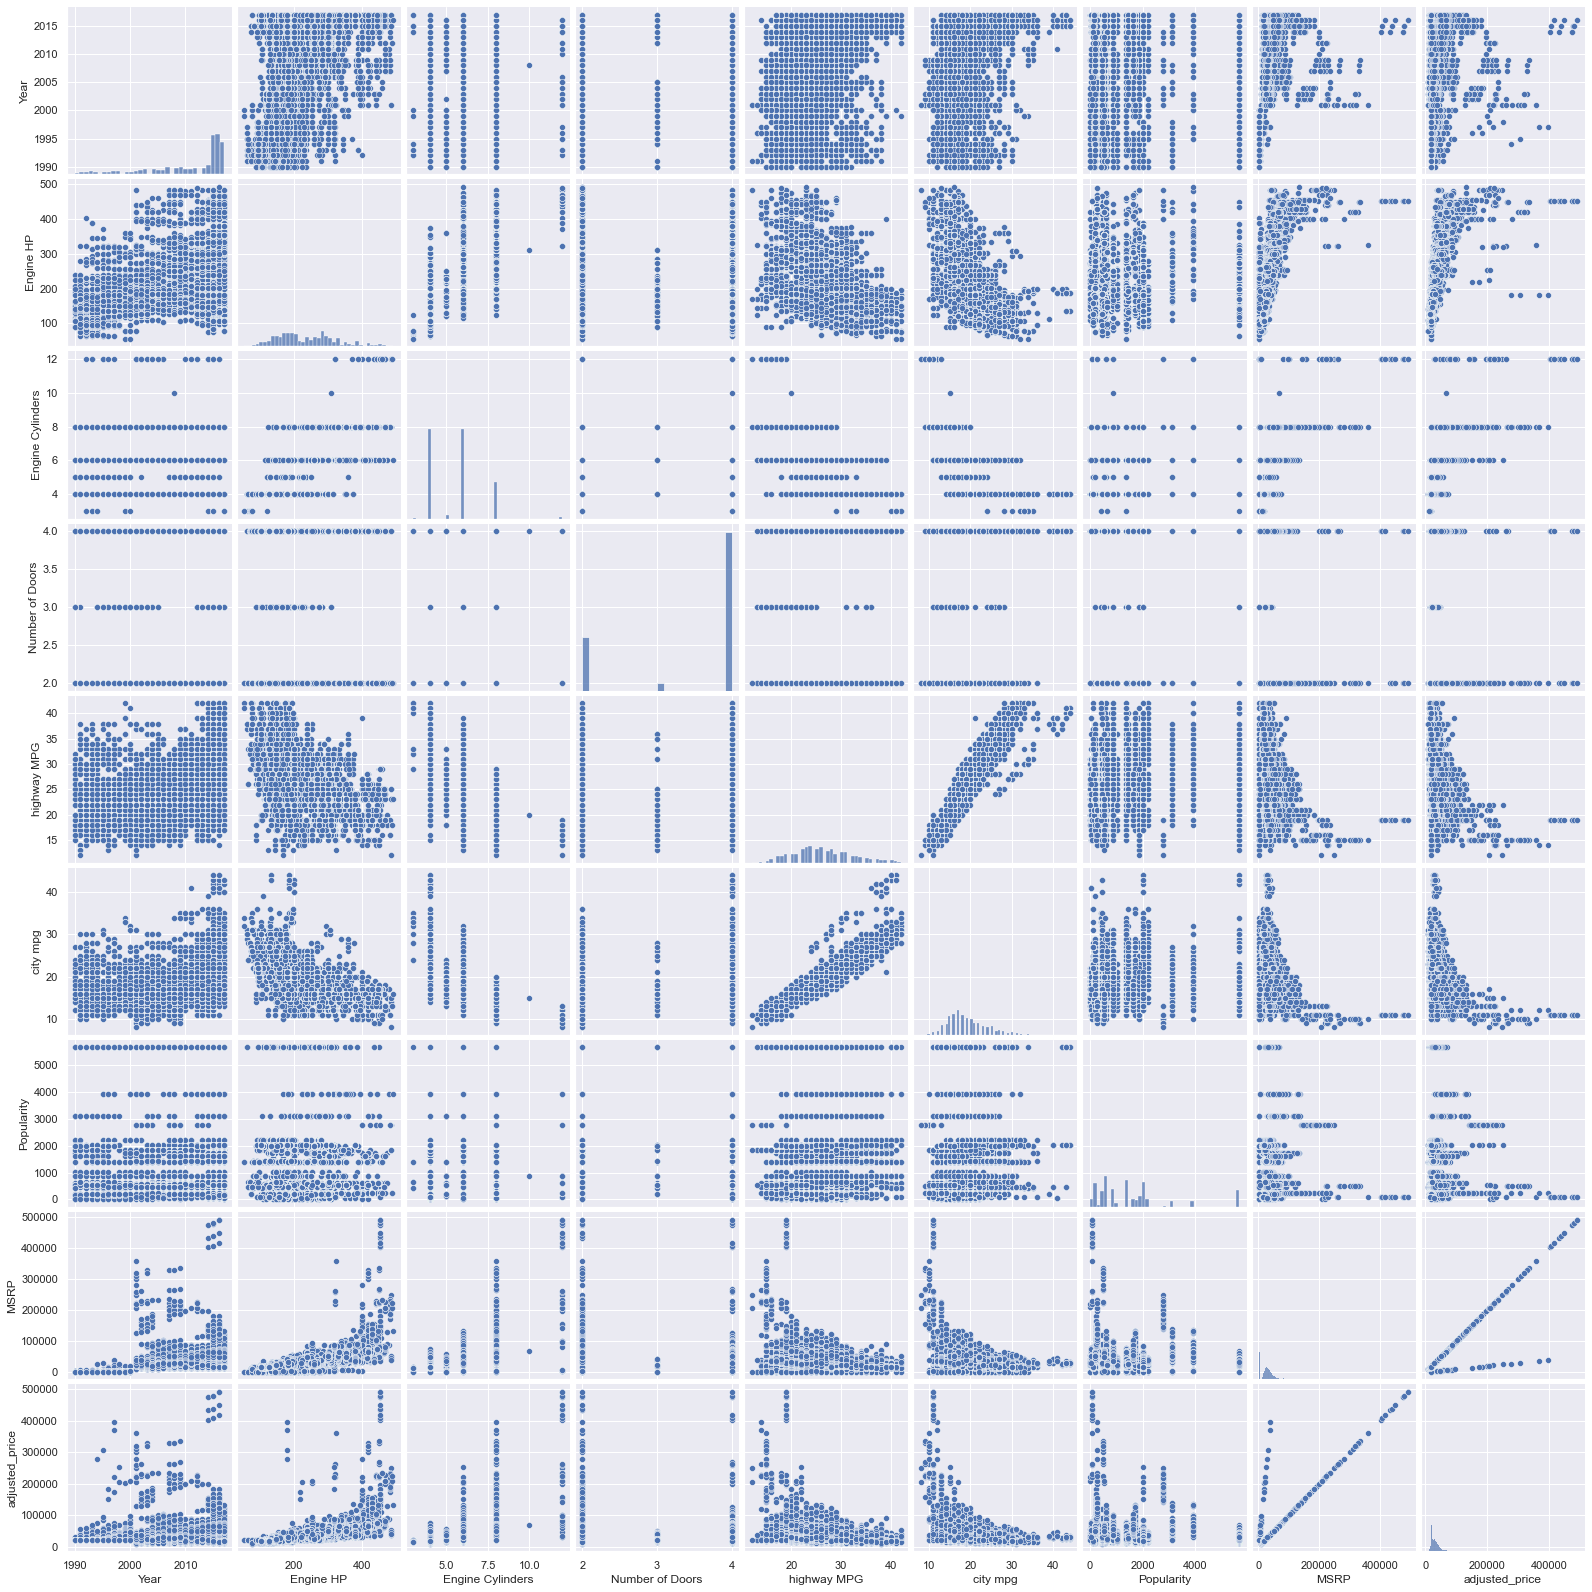

In [73]:
# Using a pairplot, display all of the linear relationship.

ax = sns.pairplot(df_cars);

In [74]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
print("Besides MSRP and adjusted_price, highway MPG and city mpg seem to have the strongest linear relationship.")


Besides MSRP and adjusted_price, highway MPG and city mpg seem to have the strongest linear relationship.


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

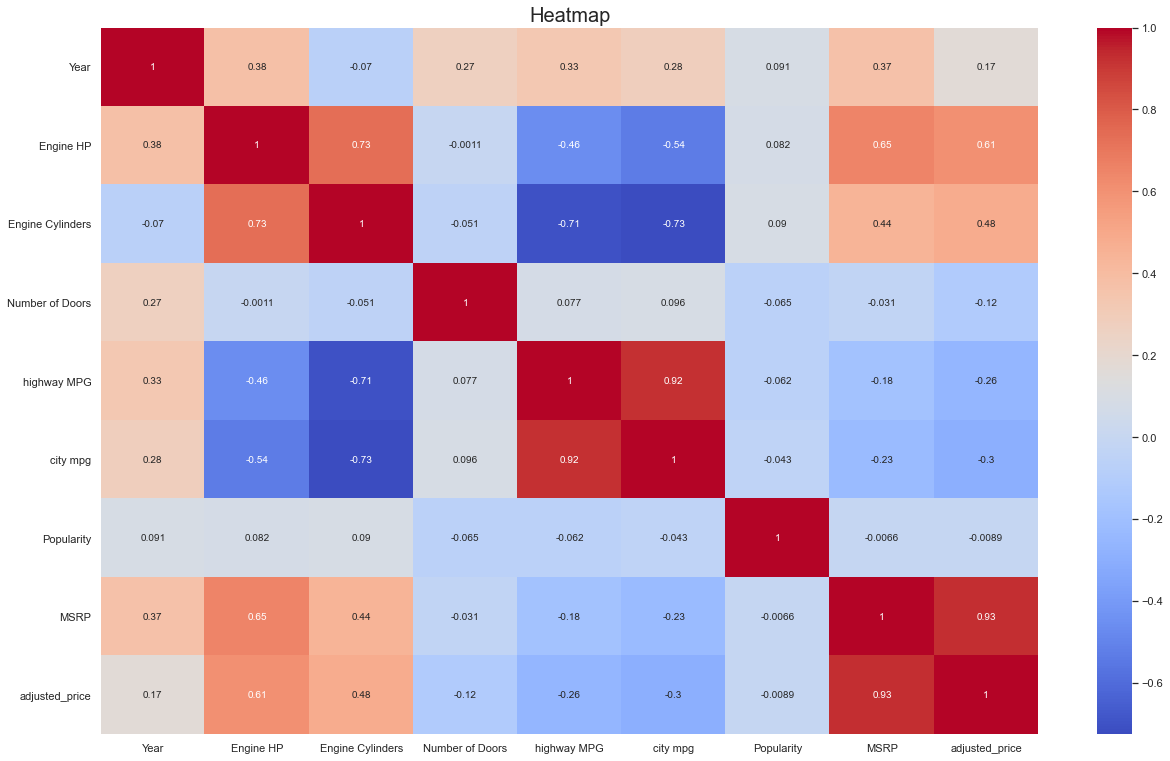

In [75]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8

ax = sns.heatmap(df_cars.corr(), annot=True, cmap='coolwarm')
ax.set_title('Heatmap', fontsize = 20);
rcParams['figure.figsize'] = 8,8

In [76]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

print('Engine HP has a strong relationship with Engine Cylinders.\nPower comes from the Engine Cylinders, so the more horsepower, the more cylinders in a car.')

Engine HP has a strong relationship with Engine Cylinders.
Power comes from the Engine Cylinders, so the more horsepower, the more cylinders in a car.


# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well


In [77]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well

# Find and replace spaces with underscores
df_cars.columns = df_cars.columns.str.replace(r" ", "_") 

# Use the map function to find all uppercase strings and change them to lowercases
df_cars.columns = map(str.lower, df_cars.columns)

# Display fisrt five rows of dataframe to show the changes
df_cars.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,adjusted_price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,34500
